# Imports and my proxying

In [ ]:
from dotenv import load_dotenv
import os
load_dotenv('../.env_api')
from rich.pretty import pprint

def ppprint(obj):
    pprint(obj, indent_guides=False)

os.environ["HTTP_PROXY"] = "http://localhost:9090"
os.environ["HTTPS_PROXY"] = "http://localhost:9090"
# os.environ["NO_PROXY"] = os.getenv("NO_PROXY", "localhost,127.0.0.1,qdrant,::1")
os.environ["REQUESTS_CA_BUNDLE"] = "/Users/tomek/Library/Application Support/com.proxyman.NSProxy-setapp/app-data/proxyman-ca.pem"
os.environ["SSL_CERT_FILE"] = "/Users/tomek/Library/Application Support/com.proxyman.NSProxy-setapp/app-data/proxyman-ca.pem"

from fastmcp import Client

from pydantic import BaseModel, Field

from qdrant_client import QdrantClient
from qdrant_client.models import Prefetch, Filter, FieldCondition, MatchText, FusionQuery

from langsmith import traceable, get_current_run_tree

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode

from langchain_core.messages import AIMessage, ToolMessage

from jinja2 import Template
from typing import Literal, Dict, Any, Annotated, List, Optional
from IPython.display import Image, display
from operator import add
from openai import OpenAI

import openai

import random
import ast
import inspect
import instructor
import json

import psycopg2
import numpy as np
from psycopg2.extras import RealDictCursor

# List available tools in MCP servers running on http://localhost:8001/mcp and http://localhost:8002/mcp

In [48]:
client = Client("http://localhost.proxyman.io:8001/mcp/")

async with client:
    # List available resources
    tools = await client.list_tools()

In [49]:
print(tools[0].name)
print(tools[0].description)
print(tools[0].inputSchema)


get_formatted_item_context
Get the top k context, each representing an inventory item for a given query.

Args:
    query: The query to get the top k context for
    top_k: The number of context chunks to retrieve, works best with 5 or more

Returns:
    A string of the top k context chunks with IDs prepending each chunk, each representing an inventory item for a given query.
{'properties': {'query': {'title': 'Query', 'type': 'string'}, 'top_k': {'default': 5, 'title': 'Top K', 'type': 'integer'}}, 'required': ['query'], 'type': 'object'}


In [50]:

client = Client("http://localhost:8002/mcp")

async with client:
    # List available resources
    tools = await client.list_tools()
    


In [51]:
print(tools[0].name)
print(tools[0].description)
print(tools[0].inputSchema)

get_formatted_review_context
Get the top k reviews matching a query for a list of prefiltered items.

Args:
    query: The query to get the top k reviews for
    item_list: The list of item IDs to prefilter before running the query
    top_k: The number of reviews to retrieve, this should be at least 20 if multiple items are prefiltered

Returns:
    A string of the top k context chunks with IDs prepending each chunk, each representing an inventory item for a given query.
{'properties': {'query': {'title': 'Query', 'type': 'string'}, 'item_list': {'items': {'type': 'string'}, 'title': 'Item List', 'type': 'array'}, 'top_k': {'default': 20, 'title': 'Top K', 'type': 'integer'}}, 'required': ['query', 'item_list'], 'type': 'object'}


# Execute a tool on one of the running MCP Servers


In [52]:
client = Client("http://localhost.proxyman.io:8001/mcp/")

async with client:
    # List available resources
    result = await client.call_tool("get_formatted_item_context", {"query": "earphones", "top_k": 5})
    


In [53]:
ppprint(result)

CallToolResult(
    content=[
        TextContent(
            type='text',
            text="- B0BLTXNNBB: Tonfarb Bone Conduction Headphones Bluetooth, Open Ear Headphones Wireless Running Earphone with Mic for Sports Hiking Running Driving Cycling Fitness Workouts Walking 【Open Ear Design】 Bone conduction headphones bluetooth deliver premium sound through the cheekbones. In contrast to over-ear headphones, the wireless running headphones make you a burden-free wearing. It can avoid some dangerous situations from happening as you can also hear the surrounding sound when you use it to listen to music. 【Premium Sound Quality】Bone conduction design, bringing high-quality sound quality, low-frequency thick, mid-frequency sensitive, high-frequency penetration, open space feeling and excellent sound performance. When you turn up the volume, there will be a high-intensity vibration, which will bring a different dynamic to your movement. 【7 Hours Play Time】The open ear headphones has the usb charging port and include 165mAh battery, enjoy 7 hours of non-stop music or podcasts, built-in microphone achieves clearer phone call for crystal clear calls. NOTE: Please keep the headphones dry without water enter in. 【Lightweight & Stable Fit】Our sport earphones weigh 26 grams, made of premium soft silicone material, keeps running relax, the open ear design helps you achieve the true painless and harmless as the earphone is no need to plug into the ear canal. With ergonomic surround and streamlined sinking design, the sports bluetooth headphones can keep on ear when running, dance, or wearing glasses. 【Bluetooth 5.0 】Over ear headphones with excellent sound quality and clarity of up to 10 m for smartphones or tablets with iOS Android and Mac.The wireless sports headphones only have one multi-function button to control all function, it is easy to use. \n- B0CCKQF5GF: IKG Wireless Earbuds, Bluetooth Headphones 5.3 Mini Wireless Headphones in Ear, 37H Playtime, Deep Bass, Bluetooth Earbuds Built-in Mic, CVC8.0 Clear Call, IPX7 Waterproof, LED Display, USB-C, Sport Stereo Quality: The wireless headphones features a 14.2mm titaniumized composite diaphragm driver. They offer thick bass, rich mids and crystal clear highs. Their sound quality exceeds 95% of half in-ear headphones. Bluetooth 5.3: Bluetooth earbuds are equipped with the latest Bluetooth 5.3 technology, providing an unprecedented audio experience with faster transmission speeds over short distances and more stable signal connections. 37 Hours of Playtime: The true wireless earbuds can be used for 7 hours of continuous use and with the charging case, you can listen for 37 hours. It only takes 15 minutes to get an hour of play time. Comfortable Fit: The bluetooth headphones in ear are ergonomically designed to fit the inner contours of the ear perfectly. They ensure comfort for the ear during use and do not fall off easily. IPX7 Waterproof: The wireless earphones feature nano-coated IPX7 waterproof technology, perfect for listening to music while hiking, biking or running. \n- B0B1HPCQQD: 9 DIGITAL Bone Conduction Headphones Bluetooth, Wireless Open Ear Headphones Waterproof with Mic, Sweatproof Earphones, Sport Headset for Running Cycling, Gym, Biking, Workouts, Hiking & Climbing Bone Conduction Headphones: This bone headphones adopt advanced Bone conduction technology that delivers sound through bone, not the ear canal, more than traditional in-ear headphones, keeping the ear canal clean and protecting the eardrum from damage, also the external sound can be heard while you listen to music. It is more safety when you cycle or run on the street or road when you wear bone bluetooth headphones. Open Ear Headphones Comfort and Safety: Bone conduction bluetooth headphones with an open ear design, wear for a long time not hurt your ears, and are more comfortable and safe. Ideal for your sports such as running, cycling, hiking, driving, climbing, skateboarding, jump rope, etc Bluetooth 5.0 and

# A function to extract tool definitions of all available tools in provided MCP servers


In [54]:
def parse_docstring_params(docstring: str) -> Dict[str, str]:
    """Extract parameter descriptions from docstring (handles both Args: and Parameters: formats)."""
    params = {}
    lines = docstring.split('\n')
    in_params = False
    current_param = None
    
    for line in lines:
        stripped = line.strip()
        
        # Check for parameter section start
        if stripped in ['Args:', 'Arguments:', 'Parameters:', 'Params:']:
            in_params = True
            current_param = None
        elif stripped.startswith('Returns:') or stripped.startswith('Raises:'):
            in_params = False
        elif in_params:
            # Parse parameter line (handles "param: desc" and "- param: desc" formats)
            if ':' in stripped and (stripped[0].isalpha() or stripped.startswith(('-', '*'))):
                param_name = stripped.lstrip('- *').split(':')[0].strip()
                param_desc = ':'.join(stripped.lstrip('- *').split(':')[1:]).strip()
                params[param_name] = param_desc
                current_param = param_name
            elif current_param and stripped:
                # Continuation of previous parameter description
                params[current_param] += ' ' + stripped
    
    return params

In [55]:
async def get_tool_descriptions_from_mcp_servers(mcp_servers: list[str]) -> list[dict]:

    tool_descriptions = []

    for mcp_server in mcp_servers:
        client = Client(mcp_server)
        async with client:
            tools = await client.list_tools()
            for tool in tools:
                tool_description = {
                    'name': tool.name,
                    'description': tool.description.split("\n\n")[0],
                    'required': tool.inputSchema.get('required', []),
                    'returns': {
                        'type': 'string',
                        'description': tool.description.split("Returns:")[1].strip(),
                    },
                    'parameters': {
                        'type': 'object',
                        'properties': {}
                    },
                    'server': mcp_server,
                }
                property_descriptions = parse_docstring_params(tool.description)
                properties = tool.inputSchema.get('properties', {})

                for key, value in properties.items():
                    properties[key]['description'] = property_descriptions.get(key, '')

                tool_description['parameters']['properties'] = properties
                tool_descriptions.append(tool_description)

    return tool_descriptions

In [56]:
mcp_servers = ["http://localhost.proxyman.io:8001/mcp/", "http://localhost.proxyman.io:8002/mcp/"]
tool_descriptions = await get_tool_descriptions_from_mcp_servers(mcp_servers)
tool_descriptions

[{'name': 'get_formatted_item_context',
  'description': 'Get the top k context, each representing an inventory item for a given query.',
  'required': ['query'],
  'returns': {'type': 'string',
   'description': 'A string of the top k context chunks with IDs prepending each chunk, each representing an inventory item for a given query.'},
  'parameters': {'type': 'object',
   'properties': {'query': {'title': 'Query',
     'type': 'string',
     'description': 'The query to get the top k context for'},
    'top_k': {'default': 5,
     'title': 'Top K',
     'type': 'integer',
     'description': 'The number of context chunks to retrieve, works best with 5 or more'}}},
  'server': 'http://localhost.proxyman.io:8001/mcp/'},
 {'name': 'get_formatted_review_context',
  'description': 'Get the top k reviews matching a query for a list of prefiltered items.',
  'required': ['query', 'item_list'],
  'returns': {'type': 'string',
   'description': 'A string of the top k context chunks with IDs

# Agent integration with tools exposed via MCP Servers


### Helper functions


In [57]:
def lc_messages_to_regular_messages(msg):

    if isinstance(msg, dict):
        
        if msg.get("role") == "user":
            return {"role": "user", "content": msg["content"]}
        elif msg.get("role") == "assistant":
            return {"role": "assistant", "content": msg["content"]}
        elif msg.get("role") == "tool":
            return {
                "role": "tool", 
                "content": msg["content"], 
                "tool_call_id": msg.get("tool_call_id")
            }
        
    elif isinstance(msg, AIMessage):

        result = {
            "role": "assistant",
            "content": msg.content
        }
        
        if hasattr(msg, 'tool_calls') and msg.tool_calls and len(msg.tool_calls) > 0 and not msg.tool_calls[0].get("name").startswith("functions."):
            result["tool_calls"] = [
                {
                    "id": tc["id"],
                    "type": "function",
                    "function": {
                        "name": tc["name"].replace("functions.", ""),
                        "arguments": json.dumps(tc["args"])
                    }
                }
                for tc in msg.tool_calls
            ]
            
        return result
    
    elif isinstance(msg, ToolMessage):

        return {"role": "tool", "content": msg.content, "tool_call_id": msg.tool_call_id}
    
    else:

        return {"role": "user", "content": str(msg)}

### Pydantic models


In [58]:
class ToolCall(BaseModel):
    name: str
    arguments: dict
    server: str

class RAGUsedContext(BaseModel):
    id: int
    description: str

class ProductQAAgentResponse(BaseModel):
    answer: str
    tool_calls: List[ToolCall] = Field(default_factory=list)
    final_answer: bool = Field(default=False)
    retrieved_context_ids: List[RAGUsedContext]

In [59]:
@traceable(
    name="product_qa_agent",
    run_type="llm",
    metadata={"ls_provider": "openai", "ls_model_name": "gpt-4.1"}
)
def product_qa_agent_node(state: State) -> dict:
   def get_prompt():
      return """You are a shopping assistant that can answer questions about the products in stock.

         You will be given a question and a list of tools you can use to answer that question.

         <Available tools>
         {{ available_tools | tojson }}
         </Available tools>

         After the tools are used you will get the outputs from the tools.

         When you need to use a tool, format your response as:

         <tool_call>
         {"name": "tool_name", "arguments": {...}}
         </tool_call>

         Use names specificly provided in the available tools. Don't add any additional text to the names.

         You should tend to use tools when additional information is needed to answer the question.

         If you set final_answer to True, you should not use any tools.

         Instructions:
         - You need to answer the question based on the retrieved context using the available tools only.
         - Never use word context and refer to it as the available products.
         - You should only answer questions about the products in stock. If the question is not about the products in stock, you should ask for clarification.
         - As a final output you need to provide:

         * The answer to the question based on the retrieved context.
         * The list of the indexes from the chunks returned from all tool calls that were used to answer the question. If more than one chunk was used to compile the answer from a single tool call, be sure to return all of them.
         * Short description of the item based on the retrieved context.

         - The answer to the question should contain detailed information about the product and returned with detailed specification in bullet points.
         - The short description should have the name of the item.
         - If the user's request requires using a tool, set tool_calls with the appropriate function name and arguments.
         - If you have all the information needed to provide a complete answer, set final_answer to True.
         """
   template = Template(get_prompt())
   
   prompt = template.render(
      available_tools=state.available_tools
   )

   messages = state.messages

   conversation = []

   for msg in messages:
      conversation.append(lc_messages_to_regular_messages(msg))

   client = instructor.from_openai(OpenAI())

   response, raw_response = client.chat.completions.create_with_completion(
        model="gpt-4.1",
        response_model=ProductQAAgentResponse,
        messages=[{"role": "system", "content": prompt}, *conversation],
        temperature=0.5,
   )

   if response.tool_calls:
      tool_calls = []
      for i, tc in enumerate(response.tool_calls):
         tool_calls.append({
               "id": f"call_{i}",
               "name": tc.name,
               "args": tc.arguments
         })

      ai_message = AIMessage(
         content=response.answer,
         tool_calls=tool_calls
         )
   else:
      ai_message = AIMessage(
         content=response.answer,
      )

   return {
      "messages": [ai_message],
      "tool_calls": response.tool_calls,
      "iteration": state.iteration + 1,
      "answer": response.answer,
      "final_answer": response.final_answer,
      "retrieved_context_ids": response.retrieved_context_ids
   }

### User Intent Router

In [60]:
class IntentRouterAgentResponse(BaseModel):
    user_intent: str
    answer: str

In [61]:
@traceable(
    name="intent_router_agent",
    run_type="llm",
    metadata={"ls_provider": "openai", "ls_model_name": "gpt-4.1"}
)
def intent_router_agent_node(state: State) -> dict:
    def get_prompt():
        return """You are a part of shopping assistant that routes user queries to the appropriate agents.

            You will be given a converation history, your task is to classify the intent of the user's latest query and output an appropriate classification.

            The possible intents are:
            - product_qa: The user is asking question about a product. This can be a question about available products, their specifications, reviews etc.
            - other: The user's latest query is not clear or not related to shopping assistant.

            Additional instructions:
            - Write the intent classification to the user_intent field.
            - If the classification is 'other', you should output the answer to the user's query trying to clarify the user's intent.
            - If the classification is 'product_qa', you should only output the intent classification and no other text.
            """
    template = Template(get_prompt())
    
    prompt = template.render()

    messages = state.messages

    conversation = []

    for msg in messages:
        conversation.append(lc_messages_to_regular_messages(msg))

    client = instructor.from_openai(OpenAI())

    response, raw_response = client.chat.completions.create_with_completion(
            model="gpt-4.1",
            response_model=IntentRouterAgentResponse,
            messages=[{"role": "system", "content": prompt}, *conversation],
            temperature=0,
    )

    if response.user_intent == "product_qa":
        ai_message = []
    else:
        ai_message = [AIMessage(
            content=response.answer,
        )]

    return {
        "messages": ai_message,
        "user_intent": response.user_intent,
        "answer": response.answer,
    }

### The Shopping Cart Agent node

#### Write to shopping cart tool

In [ ]:
def add_to_shopping_cart(items: list[dict], user_id: str, cart_id: str) -> str:

    """Add a list of provided items to the shopping cart.
    
    Args:
        items: A list of items to add to the shopping cart. Each item is a dictionary with the following keys: product_id, quantity.
        user_id: The id of the user to add the items to the shopping cart.
        cart_id: The id of the shopping cart to add the items to.
        
    Returns:
        A list of the items added to the shopping cart.
    """

    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        database="langgraph_db",
        user="langgraph_user",
        password="langgraph_password"
    )
    conn.autocommit = True

    with conn.cursor(cursor_factory=RealDictCursor) as cursor:
        
        for item in items:
            product_id = item['product_id']
            quantity = item['quantity']

            qdrant_client = QdrantClient(url="http://localhost:6333")

            dummy_vector = np.zeros(1536).tolist()
            payload = qdrant_client.query_points(
                collection_name="Amazon-items-collection-12-items",
                query=dummy_vector,
                query_filter=Filter(
                    must=[
                        FieldCondition(
                            key="parent_asin",
                            match=MatchValue(value=product_id)
                        )
                    ]
                ),
                with_payload=True,
                limit=1
            ).points[0].payload

            product_image_url = payload.get("first_large_image")
            price = payload.get("price")
            currency = 'USD'
        
            # Check if item already exists
            check_query = """
                SELECT id, quantity, price 
                FROM shopping_carts.shopping_cart_items 
                WHERE user_id = %s AND shopping_cart_id = %s AND product_id = %s
            """
            cursor.execute(check_query, (user_id, cart_id, product_id))
            existing_item = cursor.fetchone()
            
            if existing_item:
                # Update existing item
                new_quantity = existing_item['quantity'] + quantity
                
                update_query = """
                    UPDATE shopping_carts.shopping_cart_items 
                    SET 
                        quantity = %s,
                        price = %s,
                        currency = %s,
                        product_image_url = COALESCE(%s, product_image_url)
                    WHERE user_id = %s AND shopping_cart_id = %s AND product_id = %s
                    RETURNING id, quantity, price
                """
                
                cursor.execute(update_query, (new_quantity, price, currency, product_image_url, user_id, cart_id, product_id))
            
            else:
                # Insert new item
                insert_query = """
                    INSERT INTO shopping_carts.shopping_cart_items (
                        user_id, shopping_cart_id, product_id,
                        price, quantity, currency, product_image_url
                    ) VALUES (%s, %s, %s, %s, %s, %s, %s)
                    RETURNING id, quantity, price
                """
                
                cursor.execute(insert_query, (user_id, cart_id, product_id, price, quantity, currency, product_image_url))
            
    return f"Added {items} to the shopping cart."

#### Get the shopping cart tool

In [ ]:
def get_shopping_cart(user_id: str, cart_id: str) -> list[dict]:

    """
    Retrieve all items in a user's shopping cart.
    
    Args:
        user_id: User ID
        shopping_cart_id: Cart identifier
    
    Returns:
        List of dictionaries containing cart items
    """
    
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        database="langgraph_db",
        user="langgraph_user",
        password="langgraph_password"
    )
    conn.autocommit = True

    with conn.cursor(cursor_factory=RealDictCursor) as cursor:

        query = """
                SELECT 
                    product_id, price, quantity,
                    currency, product_image_url,
                    (price * quantity) as total_price
                FROM shopping_carts.shopping_cart_items 
                WHERE user_id = %s AND shopping_cart_id = %s
                ORDER BY added_at DESC
            """
        cursor.execute(query, (user_id, cart_id))

        return [dict(row) for row in cursor.fetchall()]

#### Delete from shopping cart

In [ ]:
def remove_from_cart(product_id: str, user_id: str, cart_id: str) -> str:

    """
    Remove an item completely from the shopping cart.
    
    Args:
        user_id: User ID
        product_id: Product ID to remove
        shopping_cart_id: Cart identifier
    
    Returns:
        True if item was removed, False if item wasn't found
    """
    
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        database="langgraph_db",
        user="langgraph_user",
        password="langgraph_password"
    )
    conn.autocommit = True

    with conn.cursor(cursor_factory=RealDictCursor) as cursor:

        query = """
                DELETE FROM shopping_carts.shopping_cart_items
                WHERE user_id = %s AND shopping_cart_id = %s AND product_id = %s
            """
        cursor.execute(query, (user_id, cart_id, product_id))

        return cursor.rowcount > 0

### The Tool Use Router


In [62]:
def user_intent_router(state: State) -> str:
    """Decide whether to continue or end"""
    
    if state.user_intent == "product_qa":
        return "product_qa_agent"
    else:
        return "end"

### User intent router

In [63]:
def tool_router(state: State) -> str:
    
    if state.final_answer:
        return "end"
    elif state.iteration > 2:
        return "end"
    elif len(state.tool_calls) > 0:
        return "tools"
    else:
        return "end"

### Custom tool node function that supports running tools exposed via MCP Servers


In [64]:
async def mcp_tool_node(state: State) -> str:

    tool_messages = []

    for i, tc in enumerate(state.tool_calls):

        client = Client(tc.server)

        async with client:

            result = await client.call_tool(tc.name, tc.arguments)

            tool_message = ToolMessage(
                content=result,
                tool_call_id=f"call_{i}"
            )

            tool_messages.append(tool_message)

    return {
        "messages": tool_messages
    }

### LangGraph Graph implementation with MCP support


In [65]:
class State(BaseModel):
    messages: Annotated[List[Any], add] = []
    answer: str = ""
    iteration: int = Field(default=0)
    final_answer: bool = Field(default=False)
    available_tools: List[Dict[str, Any]] = []
    tool_calls: Optional[List[ToolCall]] = Field(default_factory=list)
    retrieved_context_ids: List[RAGUsedContext] = Field(default_factory=list)
    user_intent: str = ""

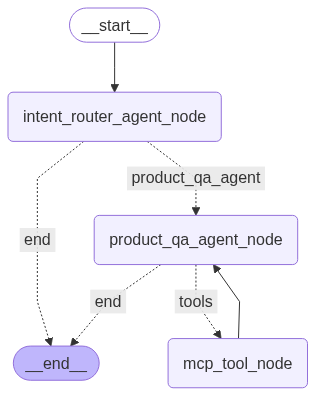

In [66]:
workflow = StateGraph(State)

mcp_servers = ["http://localhost.proxyman.io:8001/mcp/", "http://localhost.proxyman.io:8002/mcp/"]

tool_descriptions = await get_tool_descriptions_from_mcp_servers(mcp_servers)

workflow.add_edge(START, "intent_router_agent_node")

workflow.add_node("intent_router_agent_node", intent_router_agent_node)
workflow.add_node("product_qa_agent_node", product_qa_agent_node)
workflow.add_node("mcp_tool_node", mcp_tool_node)

workflow.add_conditional_edges(
    "intent_router_agent_node",
    user_intent_router,
    {
        "product_qa_agent": "product_qa_agent_node",
        "end": END
    }
)

workflow.add_conditional_edges(
    "product_qa_agent_node",
    tool_router,
    {
        "tools": "mcp_tool_node",
        "end": END
    }
)

workflow.add_edge("mcp_tool_node", "product_qa_agent_node")

graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

### Invoke the Graph (non-streaming)


In [67]:
# initial_state = {
#     "messages": [{"role": "user", "content": "Can I get earphones for myself, a laptop bag for my wife and something cool for my kids?"}],
#     "available_tools": tool_descriptions
# }
# result = await graph.ainvoke(initial_state)

### Invoke the Graph (streaming)

In [68]:
initial_state = {
    "messages": [{"role": "user", "content": "What is the capital of Italy?"}],
    # "messages": [{"role": "user", "content": "Can I get earphones for myself, a laptop bag for my wife and something cool for my kids?"}],
    "available_tools": tool_descriptions
}
async for mode, chunk in graph.astream(initial_state, stream_mode=["values", "updates"]):   
    if mode == "updates":
        pprint(chunk)
        pass
    if mode == "values":
        result = chunk
print('Execution complete')

{
│   'intent_router_agent_node': {
│   │   'messages': [
│   │   │   AIMessage(
│   │   │   │   content='The capital of Italy is Rome. Are you looking for products related to Italy or Rome, such as travel guides or souvenirs?',
│   │   │   │   additional_kwargs={},
│   │   │   │   response_metadata={}
│   │   │   )
│   │   ],
│   │   'user_intent': 'other',
│   │   'answer': 'The capital of Italy is Rome. Are you looking for products related to Italy or Rome, such as travel guides or souvenirs?'
│   }
}

Execution complete


In [69]:
pprint(result)

{
│   'messages': [
│   │   {'role': 'user', 'content': 'What is the capital of Italy?'},
│   │   AIMessage(
│   │   │   content='The capital of Italy is Rome. Are you looking for products related to Italy or Rome, such as travel guides or souvenirs?',
│   │   │   additional_kwargs={},
│   │   │   response_metadata={}
│   │   )
│   ],
│   'answer': 'The capital of Italy is Rome. Are you looking for products related to Italy or Rome, such as travel guides or souvenirs?',
│   'available_tools': [
│   │   {
│   │   │   'name': 'get_formatted_item_context',
│   │   │   'description': 'Get the top k context, each representing an inventory item for a given query.',
│   │   │   'required': ['query'],
│   │   │   'returns': {
│   │   │   │   'type': 'string',
│   │   │   │   'description': 'A string of the top k context chunks with IDs prepending each chunk, each representing an inventory item for a given query.'
│   │   │   },
│   │   │   'parameters': {
│   │   │   │   'type': 'object',
│   │   │   │   'properties': {
│   │   │   │   │   'query': {
│   │   │   │   │   │   'title': 'Query',
│   │   │   │   │   │   'type': 'string',
│   │   │   │   │   │   'description': 'The query to get the top k context for'
│   │   │   │   │   },
│   │   │   │   │   'top_k': {
│   │   │   │   │   │   'default': 5,
│   │   │   │   │   │   'title': 'Top K',
│   │   │   │   │   │   'type': 'integer',
│   │   │   │   │   │   'description': 'The number of context chunks to retrieve, works best with 5 or more'
│   │   │   │   │   }
│   │   │   │   }
│   │   │   },
│   │   │   'server': 'http://localhost.proxyman.io:8001/mcp/'
│   │   },
│   │   {
│   │   │   'name': 'get_formatted_review_context',
│   │   │   'description': 'Get the top k reviews matching a query for a list of prefiltered items.',
│   │   │   'required': ['query', 'item_list'],
│   │   │   'returns': {
│   │   │   │   'type': 'string',
│   │   │   │   'description': 'A string of the top k context chunks with IDs prepending each chunk, each representing an inventory item for a given query.'
│   │   │   },
│   │   │   'parameters': {
│   │   │   │   'type': 'object',
│   │   │   │   'properties': {
│   │   │   │   │   'query': {
│   │   │   │   │   │   'title': 'Query',
│   │   │   │   │   │   'type': 'string',
│   │   │   │   │   │   'description': 'The query to get the top k reviews for'
│   │   │   │   │   },
│   │   │   │   │   'item_list': {
│   │   │   │   │   │   'items': {'type': 'string'},
│   │   │   │   │   │   'title': 'Item List',
│   │   │   │   │   │   'type': 'array',
│   │   │   │   │   │   'description': 'The list of item IDs to prefilter before running the query'
│   │   │   │   │   },
│   │   │   │   │   'top_k': {
│   │   │   │   │   │   'default': 20,
│   │   │   │   │   │   'title': 'Top K',
│   │   │   │   │   │   'type': 'integer',
│   │   │   │   │   │   'description': 'The number of reviews to retrieve, this should be at least 20 if multiple items are prefiltered'
│   │   │   │   │   }
│   │   │   │   }
│   │   │   },
│   │   │   'server': 'http://localhost.proxyman.io:8002/mcp/'
│   │   }
│   ],
│   'user_intent': 'other'
}